# CIOPS Parcel Timing

In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import statistics

# Offshore

In [2]:
saltdiv=32
sdiv = 33.9
to_days = 1.15741*10**-14

meander = 0
init = 1
North = 2
Sshelf = 5
Sslope = 4
Offshore = 3

tide = 24
offcut = 595 

[1, 4, 5, 67, 2, 8, 6, 3]

In [17]:
csjdf = (np.array([[640,np.arange(259,275+1)[i]] for i in range(len(np.arange(259,275+1)))]))
csnorth = (np.array([[np.arange(531,585+1)[i],320] for i in range(len(np.arange(531,585+1)))]))
cssouth = (np.array([[np.arange(595,644+1)[i],199] for i in range(len(np.arange(595,644+1)))]))
csoffshore = np.array([[531,np.arange(319,300+1)[i]] for i in range(len(np.arange(319,300+1)))]+[[np.arange(531,539+1)[i],300] for i in range(len(np.arange(531,539+1)))]+
                      [[539,np.arange(300,280+1)[i]] for i in range(len(np.arange(300,280+1)))]+[[np.arange(539,547+1)[i],280] for i in range(len(np.arange(539,547+1)))]+
                      [[547,np.arange(280,259+1)[i]] for i in range(len(np.arange(280,259+1)))]+[[np.arange(547,555+1)[i],259] for i in range(len(np.arange(547,555+1)))]+
                      [[555,np.arange(259,239+1)[i]] for i in range(len(np.arange(259,239+1)))]+[[np.arange(563,555+1)[i],239] for i in range(len(np.arange(563,555+1)))]+
                      [[563,np.arange(239,219+1)[i]] for i in range(len(np.arange(239,219+1)))]+[[np.arange(563,571+1)[i],219] for i in range(len(np.arange(563,571+1)))]+
                      [[571,np.arange(219,198+1)[i]] for i in range(len(np.arange(219,198+1)))]+[[np.arange(571,594+1)[i],198] for i in range(len(np.arange(571,594+1)))])

In [65]:
# average distance of each boundary to JdF
def calculate_average_distance(cross_section_1, cross_section_2):
    distances = []
    for point1 in cross_section_1:
        min_distance = np.inf  # Start with infinity as the minimum distance
        for point2 in cross_section_2:
            # Calculate Euclidean distance between point1 and point2
            distance = np.sqrt((point2[0] - point1[0])**2 + (point2[1] - point1[1])**2)
            # Update minimum distance if this distance is smaller
            if distance < min_distance:
                min_distance = distance
        distances.append(min_distance)
    
    # Calculate the average of the minimum distances
    average_distance = np.mean(distances)
    return average_distance

disnorth = calculate_average_distance(csnorth, csjdf)*0.5 # distance in km
dissouth = calculate_average_distance(cssouth, csjdf)*0.5 # distance in km
disoff = calculate_average_distance(csoffshore, csjdf)*0.5 # distance in km

## summer 2017

In [21]:
data = xr.open_dataset('/ocean/rbeutel/MOAD/analysis-becca/Ariane/CIOPS_BC12/back_sahubdy_30sep17/ariane_positions_quantitative.nc')

In [23]:
# init_t 3601 refers to the first hour of day 150 = 2017/04/01
# init_t 7992 refers to the last hour of day 333 = 2017/09/30
# the run itself starts on 7992

monS = ['apr', 'may', 'jun', 'jul', 'aug', 'sep']
mon_len = [30, 31, 30, 31, 31, 30]
h = 3601
sum_start = [h, h+sum(mon_len[:1])*24, h+sum(mon_len[:2])*24, h+sum(mon_len[:3])*24, h+sum(mon_len[:4])*24, h+sum(mon_len[:5])*24]
sum_end = [h+sum(mon_len[:1])*24, h+sum(mon_len[:2])*24, h+sum(mon_len[:3])*24, h+sum(mon_len[:4])*24, h+sum(mon_len[:5])*24, h+sum(mon_len)*24-1]

n = 20 # days into may
start = h+sum(mon_len[:1])*24+n*24
end = h+sum(mon_len)*24-1

In [24]:
Soff_age = data.final_age[np.logical_or((data.final_section==Offshore),(data.final_section==Sslope)) & (data.final_x <= offcut) & (data.init_t >= start) & (data.init_t <= end)].astype('float')*to_days
Snorth_age = data.final_age[(data.final_section==North) & (data.init_t >= start) & (data.init_t <= end)].astype('float')*to_days
Scuc_age = data.final_age[np.logical_or((data.final_section==Sshelf),(data.final_section==Sslope)) & (data.final_x > offcut)  & (data.final_salt >= 33.9) & (data.init_t >= start) & (data.init_t <= end)].astype('float')*to_days
Ssouth_age = data.final_age[np.logical_or((data.final_section==Sshelf),(data.final_section==Sslope)) & (data.final_x > offcut) & (data.final_salt < 33.9) & (data.final_salt >= saltdiv) & (data.init_t >= start) & (data.init_t <= end)].astype('float')*to_days
Sfresh_age = data.final_age[np.logical_or((data.final_section==Sshelf),(data.final_section==Sslope)) & (data.final_x > offcut) & (data.final_salt < saltdiv) & (data.init_t >= start) & (data.init_t <= end)].astype('float')*to_days
tide=24
Sloop_age = data.final_age[(data.final_section==0) & (abs(data.init_t-data.final_t) > tide) & (data.init_t >= start) & (data.init_t <= end)].astype('float')*to_days

In [25]:
time = -(start) + (end) + 1
Soff_tr = data.final_transp[np.logical_or((data.final_section==Offshore),(data.final_section==Sslope)) & (data.final_x <= offcut) & (data.init_t >= start) & (data.init_t <= end)]/time
Snorth_tr = data.final_transp[(data.final_section==North) & (data.init_t >= start) & (data.init_t <= end)]/time
Scuc_tr = data.final_transp[np.logical_or((data.final_section==Sshelf),(data.final_section==Sslope)) & (data.final_x > offcut)  & (data.final_salt >= 33.9) & (data.init_t >= start) & (data.init_t <= end)]/time
Ssouth_tr = data.final_transp[np.logical_or((data.final_section==Sshelf),(data.final_section==Sslope)) & (data.final_x > offcut) & (data.final_salt < 33.9) & (data.final_salt >= saltdiv) & (data.init_t >= start) & (data.init_t <= end)]/time
Sfresh_tr = data.final_transp[np.logical_or((data.final_section==Sshelf),(data.final_section==Sslope)) & (data.final_x > offcut) & (data.final_salt < saltdiv) & (data.init_t >= start) & (data.init_t <= end)]/time
Sloop_tr = data.final_transp[(data.final_section==0) & (abs(data.init_t-data.final_t) > tide) & (data.init_t >= start) & (data.init_t <= end)]/time

In [26]:
# Stotal = np.sum([np.sum(Scuc_tr), np.sum(Ssouth_tr), np.sum(Sfresh_tr), np.sum(Snorth_tr), np.sum(Soff_tr), np.sum(Sloop_tr)])
# Stotal = 1000
Stotal = np.sum(data.final_transp[(np.isnan(data.final_section)==False) & (abs(data.init_t-data.final_t) > tide)&(data.init_t >= start) & (data.init_t <= end)]/time)
Stotal


<xarray.DataArray 'final_transp' ()>
array(102765.91460045)

In [27]:
statistics.mode(list(np.round(Soff_age,0).values))

42.0

In [28]:
np.min(Soff_age)

<xarray.DataArray 'final_age' ()>
array(18.47067288)

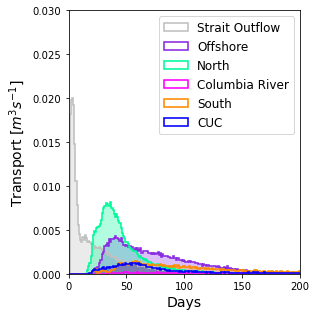

In [30]:
fig, ax = plt.subplots(1,1, figsize = (4.5,4.5))

bins = np.arange(0,300,1)
colours = ['b', 'darkorange', 'magenta', 'mediumspringgreen', 'blueviolet', 'silver']

n, _, _ = ax.hist([Scuc_age,Ssouth_age,Sfresh_age, Snorth_age, Soff_age, Sloop_age], bins=bins, weights=[Scuc_tr/Stotal, Ssouth_tr/Stotal, Sfresh_tr/Stotal, Snorth_tr/Stotal, Soff_tr/Stotal, Sloop_tr/Stotal], color = colours, label =['CUC', 'South', 'Columbia River', "North", "Offshore", 'Strait Outflow'], linewidth = 1.6, histtype='step', stacked=False, zorder=2)
ax.hist([Scuc_age,Ssouth_age,Sfresh_age, Snorth_age, Soff_age, Sloop_age], bins=bins, weights=[Scuc_tr/Stotal, Ssouth_tr/Stotal, Sfresh_tr/Stotal, Snorth_tr/Stotal, Soff_tr/Stotal, Sloop_tr/Stotal], color = colours, histtype='stepfilled', alpha=0.3, stacked=False, zorder=1)
ax.set_xlabel('Days',fontsize=14)
ax.set_ylabel('Transport [$m^{3}s^{-1}$]',fontsize=14)
# ax.set_yticks(np.arange(200,801,200))
# ax.set_yticklabels(np.arange(200,801,200),fontsize=12)
# ax.set_xticks(np.arange(0,201,50))
# ax.set_xticklabels(np.arange(0,201,50),fontsize=12);
ax.set_xlim([0,200])
ax.set_ylim([0,0.03])
ax.legend(fontsize=12)


plt.tight_layout()

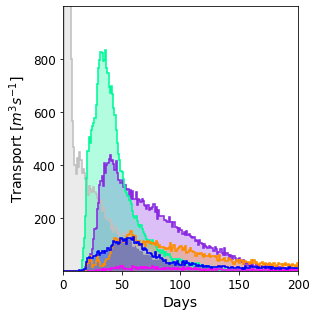

In [31]:
fig, ax = plt.subplots(1,1, figsize = (4.5,4.5))

bins = np.arange(0,300,1)
colours = ['b', 'darkorange', 'magenta', 'mediumspringgreen', 'blueviolet', 'silver']

n, _, _ = ax.hist([Scuc_age,Ssouth_age,Sfresh_age, Snorth_age, Soff_age, Sloop_age], bins=bins, weights=[Scuc_tr, Ssouth_tr, Sfresh_tr, Snorth_tr, Soff_tr, Sloop_tr], color = colours, label =['CUC', 'South', 'Columbia River', "North", "Offshore", 'Strait Outflow'], linewidth = 1.6, histtype='step', stacked=False, zorder=2)
ax.hist([Scuc_age,Ssouth_age,Sfresh_age, Snorth_age, Soff_age, Sloop_age], bins=bins, weights=[Scuc_tr, Ssouth_tr, Sfresh_tr, Snorth_tr, Soff_tr, Sloop_tr], color = colours, histtype='stepfilled', alpha=0.3, stacked=False, zorder=1)
ax.set_xlabel('Days',fontsize=14)
ax.set_ylabel('Transport [$m^{3}s^{-1}$]',fontsize=14)
ax.set_yticks(np.arange(200,801,200))
ax.set_yticklabels(np.arange(200,801,200),fontsize=12)
ax.set_xticks(np.arange(0,201,50))
ax.set_xticklabels(np.arange(0,201,50),fontsize=12);
ax.set_xlim([0,200])
ax.set_ylim([0,1000])

plt.tight_layout()
# plt.savefig("./figures/SummerTime.pdf")

## winter 2016/17

In [32]:
dataS=data
data = xr.open_dataset('/ocean/rbeutel/MOAD/analysis-becca/Ariane/CIOPS_BC12/back_sahubdy_31mar17/ariane_positions_quantitative.nc')

In [33]:
# init_t 3601 refers to the first hour of day 150 = 2017/04/01
# init_t 7992 refers to the last hour of day 333 = 2017/09/30
# the run itself starts on 7992

mon16 = ['oct16', 'nov16', 'dec16', 'jan17', 'feb17', 'mar17']
mon_len = [31, 30, 31, 31, 28, 31]
h = 3601
win_start = [h, h+sum(mon_len[:1])*24, h+sum(mon_len[:2])*24, h+sum(mon_len[:3])*24, h+sum(mon_len[:4])*24, h+sum(mon_len[:5])*24]
win_end = [h+sum(mon_len[:1])*24, h+sum(mon_len[:2])*24, h+sum(mon_len[:3])*24, h+sum(mon_len[:4])*24, h+sum(mon_len[:5])*24, h+sum(mon_len)*24-1]

In [34]:
W16off_age = np.append([data.final_age[np.logical_or((data.final_section==Offshore),(data.final_section==Sslope)) & (data.final_x <= offcut) & (data.init_t >= win_start[0]) & (data.init_t <= win_end[-1])]],
                     [dataS.final_age[np.logical_or((dataS.final_section==Offshore),(dataS.final_section==Sslope)) & (dataS.final_x <= offcut) & (dataS.init_t >= sum_start[0]) & (dataS.init_t <= sum_end[0])]]).astype('float')*to_days

W16north_age = np.append([data.final_age[(data.final_section==North) & (data.init_t >= win_start[0]) & (data.init_t <= win_end[-1])]],
                       [dataS.final_age[(dataS.final_section==North) & (dataS.init_t >= sum_start[0]) & (dataS.init_t <= sum_end[0])]]).astype('float')*to_days

W16cuc_age = np.append([data.final_age[np.logical_or((data.final_section==Sshelf),(data.final_section==Sslope)) & (data.final_x > offcut)& (data.final_salt >= sdiv) & (data.init_t >= win_start[0]) & (data.init_t <= win_end[-1])]],
                    [dataS.final_age[np.logical_or((dataS.final_section==Sshelf),(dataS.final_section==Sslope)) & (dataS.final_x > offcut) & (dataS.final_salt >= sdiv) & (dataS.init_t >= sum_start[0]) & (dataS.init_t <= sum_end[0])]]).astype('float')*to_days

W16south_age = np.append([data.final_age[np.logical_or((data.final_section==Sshelf),(data.final_section==Sslope)) & (data.final_x > offcut) & (data.final_salt >= saltdiv) & (data.final_salt < sdiv) & (data.init_t >= win_start[0]) & (data.init_t <= win_end[-1])]],
                       [dataS.final_age[np.logical_or((dataS.final_section==Sshelf),(dataS.final_section==Sslope)) & (dataS.final_x > offcut) & (dataS.final_salt >= saltdiv) & (dataS.final_salt < sdiv)  & (dataS.init_t >= sum_start[0]) & (dataS.init_t <= sum_end[0])]]).astype('float')*to_days

W16fresh_age = np.append([data.final_age[np.logical_or((data.final_section==Sshelf),(data.final_section==Sslope)) & (data.final_x > offcut) & (data.final_salt < saltdiv) & (data.init_t >= win_start[0]) & (data.init_t <= win_end[-1])]],
                       [dataS.final_age[np.logical_or((dataS.final_section==Sshelf),(dataS.final_section==Sslope)) & (dataS.final_x > offcut) & (dataS.final_salt < saltdiv)  & (dataS.init_t >= sum_start[0]) & (dataS.init_t <= sum_end[0])]]).astype('float')*to_days

tide=24
W16loop_age = np.append([data.final_age[(data.final_section==0) & (abs(data.init_t-data.final_t) > tide) & (data.init_t >= win_start[0]) & (data.init_t <= win_end[-1])]],
                      [dataS.final_age[(dataS.final_section==0) & (abs(dataS.init_t-dataS.final_t) > tide) & (dataS.init_t >= sum_start[0]) & (dataS.init_t <= sum_end[0])]]).astype('float')*to_days

In [35]:
time = win_end[-1]-win_start[0]+sum_end[1]-sum_start[0]+2
W16off_tr = np.append([data.final_transp[np.logical_or((data.final_section==Offshore),(data.final_section==Sslope)) & (data.final_x <= offcut) & (data.init_t >= win_start[0]) & (data.init_t <= win_end[-1])]],
                     [dataS.final_transp[np.logical_or((dataS.final_section==Offshore),(dataS.final_section==Sslope)) & (dataS.final_x <= offcut) & (dataS.init_t >= sum_start[0]) & (dataS.init_t <= sum_end[0])]])/time

W16north_tr = np.append([data.final_transp[(data.final_section==North) & (data.init_t >= win_start[0]) & (data.init_t <= win_end[-1])]],
                       [dataS.final_transp[(dataS.final_section==North) & (dataS.init_t >= sum_start[0]) & (dataS.init_t <= sum_end[0])]])/time

W16cuc_tr = np.append([data.final_transp[np.logical_or((data.final_section==Sshelf),(data.final_section==Sslope)) & (data.final_x > offcut)& (data.final_salt >= sdiv) & (data.init_t >= win_start[0]) & (data.init_t <= win_end[-1])]],
                    [dataS.final_transp[np.logical_or((dataS.final_section==Sshelf),(dataS.final_section==Sslope)) & (dataS.final_x > offcut) & (dataS.final_salt >= sdiv) & (dataS.init_t >= sum_start[0]) & (dataS.init_t <= sum_end[0])]])/time

W16south_tr = np.append([data.final_transp[np.logical_or((data.final_section==Sshelf),(data.final_section==Sslope)) & (data.final_x > offcut) & (data.final_salt >= saltdiv)& (data.final_salt < sdiv) & (data.init_t >= win_start[0]) & (data.init_t <= win_end[-1])]],
                       [dataS.final_transp[np.logical_or((dataS.final_section==Sshelf),(dataS.final_section==Sslope)) & (dataS.final_x > offcut) & (dataS.final_salt >= saltdiv) & (dataS.final_salt < sdiv) & (dataS.init_t >= sum_start[0]) & (dataS.init_t <= sum_end[0])]])/time

W16fresh_tr = np.append([data.final_transp[np.logical_or((data.final_section==Sshelf),(data.final_section==Sslope)) & (data.final_x > offcut) & (data.final_salt < saltdiv) & (data.init_t >= win_start[0]) & (data.init_t <= win_end[-1])]],
                       [dataS.final_transp[np.logical_or((dataS.final_section==Sshelf),(dataS.final_section==Sslope)) & (dataS.final_x > offcut) & (dataS.final_salt < saltdiv)  & (dataS.init_t >= sum_start[0]) & (dataS.init_t <= sum_end[0])]])/time

W16loop_tr = np.append([data.final_transp[(data.final_section==0) & (abs(data.init_t-data.final_t) > tide) & (data.init_t >= win_start[0]) & (data.init_t <= win_end[-1])]],
                      [dataS.final_transp[(dataS.final_section==0) & (abs(dataS.init_t-dataS.final_t) > tide) & (dataS.init_t >= sum_start[0]) & (dataS.init_t <= sum_end[0])]])/time

In [36]:
statistics.mode(list(np.round(W16cuc_age,0)))

30.0

In [37]:
np.min(W16cuc_age)

11.52149971209438

In [38]:
# W16total = np.sum([np.sum(W16cuc_tr), np.sum(W16south_tr), np.sum(W16fresh_tr), np.sum(W16north_tr), np.sum(W16off_tr), np.sum(W16loop_tr)])

W16total= np.sum(np.append([data.final_transp[(np.isnan(data.final_section)==False) & (abs(data.init_t-data.final_t) > tide) & (data.init_t >= win_start[0]) & (data.init_t <= win_end[-1])]],
                       [dataS.final_transp[(np.isnan(dataS.final_section)==False) & (abs(dataS.init_t-dataS.final_t) > tide) & (dataS.init_t >= sum_start[0]) & (dataS.init_t <= sum_end[0])]])/time)
W16total

75525.89344887758

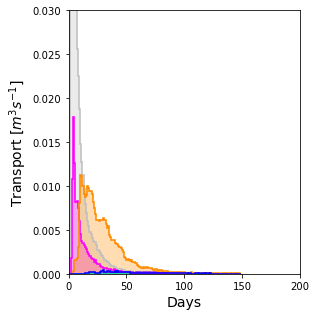

In [39]:
fig, ax = plt.subplots(1,1, figsize = (4.5,4.5))

bins = np.arange(0,150,1)
colours = ['b', 'darkorange', 'magenta', 'mediumspringgreen', 'blueviolet', 'silver']

n, _, _ = ax.hist([W16cuc_age,W16south_age,W16fresh_age, W16north_age, W16off_age, W16loop_age], bins=bins, weights=[W16cuc_tr/W16total, W16south_tr/W16total, W16fresh_tr/W16total, W16north_tr/W16total, W16off_tr/W16total, W16loop_tr/W16total], color = colours, label =['South Deep', 'South Shelf', 'Columbia River', "North", "Offshore", "Strait Outflow"], linewidth = 1.6, histtype='step', stacked=False, zorder=2)
ax.hist([W16cuc_age,W16south_age,W16fresh_age, W16north_age, W16off_age, W16loop_age], bins=bins, weights=[W16cuc_tr/W16total, W16south_tr/W16total, W16fresh_tr/W16total, W16north_tr/W16total, W16off_tr/W16total, W16loop_tr/W16total], color = colours, histtype='stepfilled', alpha=0.3, stacked=False, zorder=1)
# ax.legend(fontsize=12)
ax.set_xlabel('Days',fontsize=14)
ax.set_ylabel('Transport [$m^{3}s^{-1}$]',fontsize=14)
# ax.set_yticks(np.arange(200,1401,400))
# ax.set_yticklabels(np.arange(200,1401,400),fontsize=12)
# ax.set_xticks(np.arange(0,201,50))
# ax.set_xticklabels(np.arange(0,201,50),fontsize=12);
ax.set_xlim([0,200])
ax.set_ylim([0,0.03])

plt.tight_layout()

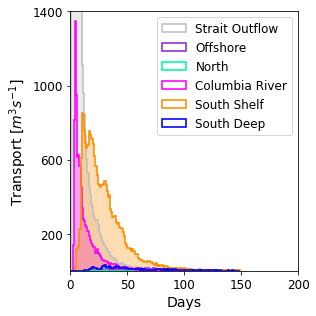

In [40]:
fig, ax = plt.subplots(1,1, figsize = (4.5,4.5))

bins = np.arange(0,150,1)
colours = ['b', 'darkorange', 'magenta', 'mediumspringgreen', 'blueviolet', 'silver']

n, _, _ = ax.hist([W16cuc_age,W16south_age,W16fresh_age, W16north_age, W16off_age, W16loop_age], bins=bins, weights=[W16cuc_tr, W16south_tr, W16fresh_tr, W16north_tr, W16off_tr, W16loop_tr], color = colours, label =['South Deep', 'South Shelf', 'Columbia River', "North", "Offshore", "Strait Outflow"], linewidth = 1.6, histtype='step', stacked=False, zorder=2)
ax.hist([W16cuc_age,W16south_age,W16fresh_age, W16north_age, W16off_age, W16loop_age], bins=bins, weights=[W16cuc_tr, W16south_tr, W16fresh_tr, W16north_tr, W16off_tr, W16loop_tr], color = colours, histtype='stepfilled', alpha=0.3, stacked=False, zorder=1)
ax.legend(fontsize=12)
ax.set_xlabel('Days',fontsize=14)
ax.set_ylabel('Transport [$m^{3}s^{-1}$]',fontsize=14)
ax.set_yticks(np.arange(200,1401,400))
ax.set_yticklabels(np.arange(200,1401,400),fontsize=12)
ax.set_xticks(np.arange(0,201,50))
ax.set_xticklabels(np.arange(0,201,50),fontsize=12);
ax.set_xlim([0,200])
ax.set_ylim([0,1400])

plt.tight_layout()
# plt.savefig("./figures/W16Time.pdf")

## winter 2017/18

In [41]:
data = xr.open_dataset('/ocean/rbeutel/MOAD/analysis-becca/Ariane/CIOPS_BC12/back_sahubdy_31mar18/ariane_positions_quantitative.nc')

In [42]:
# init_t 3601 refers to the first hour of day 150 = 2017/04/01
# init_t 7992 refers to the last hour of day 333 = 2017/09/30
# the run itself starts on 7992

mon17 = ['oct17', 'nov17', 'dec17', 'jan18', 'feb18', 'mar18']
mon_len = [31, 30, 31, 31, 28, 31]
h = 3601
win_start = [h+20*24, h+sum(mon_len[:1])*24, h+sum(mon_len[:2])*24, h+sum(mon_len[:3])*24, h+sum(mon_len[:4])*24, h+sum(mon_len[:5])*24]
win_end = [h+sum(mon_len[:1])*24, h+sum(mon_len[:2])*24, h+sum(mon_len[:3])*24, h+sum(mon_len[:4])*24, h+sum(mon_len[:5])*24, h+sum(mon_len)*24-1]

In [43]:
W17off_age = data.final_age[np.logical_or((data.final_section==Offshore),(data.final_section==Sslope)) & (data.final_x <= offcut) & (data.init_t >= win_start[0]) & (data.init_t <= win_end[-1])].astype('float')*to_days
W17north_age = data.final_age[(data.final_section==North) & (data.init_t >= win_start[0]) & (data.init_t <= win_end[-1])].astype('float')*to_days
W17cuc_age = data.final_age[np.logical_or((data.final_section==Sshelf),(data.final_section==Sslope)) & (data.final_x > offcut)  & (data.final_salt >= sdiv) & (data.init_t >= win_start[0]) & (data.init_t <= win_end[-1])].astype('float')*to_days
W17south_age = data.final_age[np.logical_or((data.final_section==Sshelf),(data.final_section==Sslope)) & (data.final_x > offcut) & (data.final_salt < sdiv) & (data.final_salt >= saltdiv) & (data.init_t >= win_start[0]) & (data.init_t <= win_end[-1])].astype('float')*to_days
W17fresh_age = data.final_age[np.logical_or((data.final_section==Sshelf),(data.final_section==Sslope)) & (data.final_x > offcut) & (data.final_salt < saltdiv) & (data.init_t >= win_start[0]) & (data.init_t <= win_end[-1])].astype('float')*to_days
W17loop_age = data.final_age[(data.final_section==0) & (abs(data.init_t-data.final_t) > tide) & (data.init_t >= win_start[0]) & (data.init_t <= win_end[-1])].astype('float')*to_days

In [44]:
time = -(win_start[0]) + (win_end[-1]) + 1
W17off_tr = data.final_transp[np.logical_or((data.final_section==Offshore),(data.final_section==Sslope)) & (data.final_x <= offcut) & (data.init_t >= win_start[0]) & (data.init_t <= win_end[-1])]/time
W17north_tr = data.final_transp[(data.final_section==North) & (data.init_t >= win_start[0]) & (data.init_t <= win_end[-1])]/time
W17cuc_tr = data.final_transp[np.logical_or((data.final_section==Sshelf),(data.final_section==Sslope)) & (data.final_x > offcut) & (data.final_salt >= sdiv) & (data.init_t >= win_start[0]) & (data.init_t <= win_end[-1])]/time
W17south_tr = data.final_transp[np.logical_or((data.final_section==Sshelf),(data.final_section==Sslope)) & (data.final_x > offcut) & (data.final_salt < sdiv) & (data.final_salt >= saltdiv) & (data.init_t >= win_start[0]) & (data.init_t <= win_end[-1])]/time
W17fresh_tr = data.final_transp[np.logical_or((data.final_section==Sshelf),(data.final_section==Sslope)) & (data.final_x > offcut) & (data.final_salt < saltdiv) & (data.init_t >= win_start[0]) & (data.init_t <= win_end[-1])]/time
W17loop_tr = data.final_transp[(data.final_section==0) & (abs(data.init_t-data.final_t) > tide) & (data.init_t >= win_start[0]) & (data.init_t <= win_end[-1])]/time

In [45]:
W17total = np.sum(data.final_transp[(np.isnan(data.final_section)==False) & (abs(data.init_t-data.final_t) > tide)&(data.init_t >= win_start[0]) & (data.init_t <= win_end[-1])]/time)
W17total


<xarray.DataArray 'final_transp' ()>
array(86714.60366829)

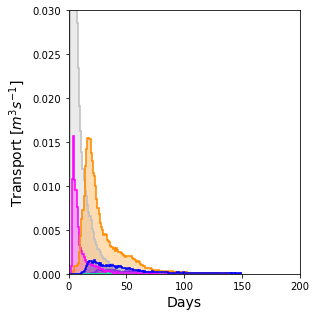

In [46]:
fig, ax = plt.subplots(1,1, figsize = (4.5,4.5))

bins = np.arange(0,150,1)
colours = ['b', 'darkorange', 'magenta', 'mediumspringgreen', 'blueviolet', 'silver']

n, _, _ = ax.hist([W17cuc_age,W17south_age,W17fresh_age, W17north_age, W17off_age, W17loop_age], bins=bins, weights=[W17cuc_tr/W17total, W17south_tr/W17total, W17fresh_tr/W17total, W17north_tr/W17total, W17off_tr/W17total, W17loop_tr/W17total], color = colours, label =['South Deep', 'South Shelf', 'Columbia River', "North", "Offshore", "Strait Outflow"], linewidth = 1.6, histtype='step', stacked=False, zorder=2)
ax.hist([W17cuc_age,W17south_age,W17fresh_age, W17north_age, W17off_age, W17loop_age], bins=bins, weights=[W17cuc_tr/W17total, W17south_tr/W17total, W17fresh_tr/W17total, W17north_tr/W17total, W17off_tr/W17total, W17loop_tr/W17total], color = colours, histtype='stepfilled', alpha=0.3, stacked=False, zorder=1)
# ax.legend(fontsize=12)
ax.set_xlabel('Days',fontsize=14)
ax.set_ylabel('Transport [$m^{3}s^{-1}$]',fontsize=14)
# ax.set_yticks(np.arange(200,1401,400))
# ax.set_yticklabels(np.arange(200,1401,400),fontsize=12)
# ax.set_xticks(np.arange(0,201,50))
# ax.set_xticklabels(np.arange(0,201,50),fontsize=12);
ax.set_xlim([0,200])
ax.set_ylim([0,0.03])

plt.tight_layout()

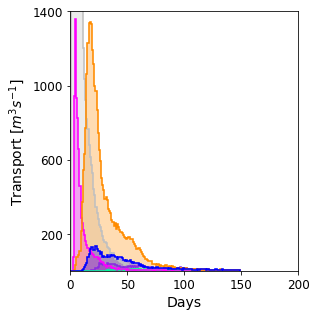

In [48]:
fig, ax = plt.subplots(1,1, figsize = (4.5,4.5))

bins = np.arange(0,150,1)
colours = ['b', 'darkorange', 'magenta', 'mediumspringgreen', 'blueviolet','silver']

n, _, _ = ax.hist([W17cuc_age,W17south_age,W17fresh_age, W17north_age, W17off_age, W17loop_age], bins=bins, weights=[W17cuc_tr, W17south_tr, W17fresh_tr, W17north_tr, W17off_tr, W17loop_tr], color = colours, label =['CUC', 'South', 'Columbia River', "North", "Offshore", "Strait Outflow"], linewidth = 1.6, histtype='step', stacked=False, zorder=2)
ax.hist([W17cuc_age,W17south_age,W17fresh_age, W17north_age, W17off_age, W17loop_age], bins=bins, weights=[W17cuc_tr, W17south_tr, W17fresh_tr, W17north_tr, W17off_tr, W17loop_tr], color = colours, histtype='stepfilled', alpha=0.3, stacked=False, zorder=1)
ax.set_xlabel('Days',fontsize=14)
ax.set_ylabel('Transport [$m^{3}s^{-1}$]',fontsize=14)
ax.set_yticks(np.arange(200,1401,400))
ax.set_yticklabels(np.arange(200,1401,400),fontsize=12)
ax.set_xticks(np.arange(0,201,50))
ax.set_xticklabels(np.arange(0,201,50),fontsize=12);
ax.set_xlim([0,200])
ax.set_ylim([0,1400])

plt.tight_layout()
# plt.savefig("./figures/W17Time.pdf")

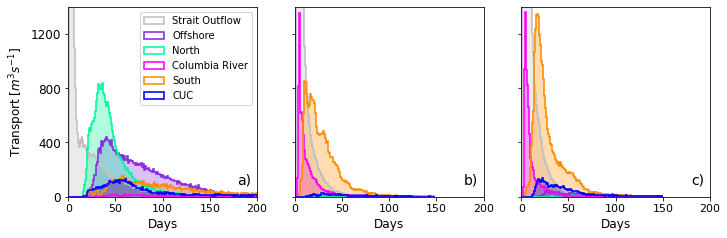

In [49]:
# all together in one figure
fig, ax = plt.subplots(1,3, figsize = (11.5,3.5))

colours = ['b', 'darkorange', 'magenta', 'mediumspringgreen', 'blueviolet', 'silver']

letter = ['a)','b)','c)']
k=0
for axs in ax:
    axs.set_xticks(np.arange(0,201,50))
    axs.set_xticklabels(np.arange(0,201,50),fontsize=11)
    axs.set_yticks(np.arange(0,1401,400))
    axs.set_xlim([0,200])
    axs.set_ylim([0,1400])
    axs.set_xlabel('Days',fontsize=12)
    axs.text(.97, .05, letter[k], ha='right', va='bottom', transform=axs.transAxes, fontsize=14)
    k+=1



# summer 2017
bins = np.arange(0,300,1)
n, _, _ = ax[0].hist([Scuc_age,Ssouth_age,Sfresh_age, Snorth_age, Soff_age, Sloop_age], bins=bins, weights=[Scuc_tr, Ssouth_tr, Sfresh_tr, Snorth_tr, Soff_tr, Sloop_tr], color = colours, label =['CUC', 'South', 'Columbia River', "North", "Offshore", 'Strait Outflow'], linewidth = 1.6, histtype='step', stacked=False, zorder=2)
ax[0].hist([Scuc_age,Ssouth_age,Sfresh_age, Snorth_age, Soff_age, Sloop_age], bins=bins, weights=[Scuc_tr, Ssouth_tr, Sfresh_tr, Snorth_tr, Soff_tr, Sloop_tr], color = colours, histtype='stepfilled', alpha=0.3, stacked=False, zorder=1)

ax[0].set_yticklabels(np.arange(0,1401,400),fontsize=12)
ax[0].set_ylabel('Transport [$m^{3}s^{-1}$]',fontsize=12)
ax[0].legend()

# winter 2016/17
bins = np.arange(0,150,1)
n, _, _ = ax[1].hist([W16cuc_age,W16south_age,W16fresh_age, W16north_age, W16off_age, W16loop_age], bins=bins, weights=[W16cuc_tr, W16south_tr, W16fresh_tr, W16north_tr, W16off_tr, W16loop_tr], color = colours, label =['South Deep', 'South Shelf', 'Columbia River', "North", "Offshore", "Strait Outflow"], linewidth = 1.6, histtype='step', stacked=False, zorder=2)
ax[1].hist([W16cuc_age,W16south_age,W16fresh_age, W16north_age, W16off_age, W16loop_age], bins=bins, weights=[W16cuc_tr, W16south_tr, W16fresh_tr, W16north_tr, W16off_tr, W16loop_tr], color = colours, histtype='stepfilled', alpha=0.3, stacked=False, zorder=1)
ax[1].set_yticklabels([])

# winter 2017/18
n, _, _ = ax[2].hist([W17cuc_age,W17south_age,W17fresh_age, W17north_age, W17off_age, W17loop_age], bins=bins, weights=[W17cuc_tr, W17south_tr, W17fresh_tr, W17north_tr, W17off_tr, W17loop_tr], color = colours, label =['South Deep', 'South Shelf', 'Columbia River', "North", "Offshore", "Strait Outflow"], linewidth = 1.6, histtype='step', stacked=False, zorder=2)
ax[2].hist([W17cuc_age,W17south_age,W17fresh_age, W17north_age, W17off_age, W17loop_age], bins=bins, weights=[W17cuc_tr, W17south_tr, W17fresh_tr, W17north_tr, W17off_tr, W17loop_tr], color = colours, histtype='stepfilled', alpha=0.3, stacked=False, zorder=1)
ax[2].set_yticklabels([]);

plt.savefig("./figures/Time.pdf")

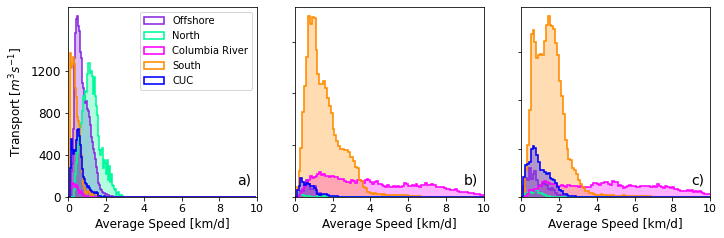

In [74]:
# normalized by the distance to PRT
# doesn't make sense to have loop flow in this
fig, ax = plt.subplots(1,3, figsize = (11.5,3.5))

colours = ['b', 'darkorange', 'magenta', 'mediumspringgreen', 'blueviolet']

letter = ['a)','b)','c)']
k=0
for axs in ax:
    axs.set_xticks(np.arange(0,20,2))
    axs.set_xticklabels(np.arange(0,20,2),fontsize=11)
    axs.set_yticks(np.arange(0,1401,400))
    axs.set_xlim([0,10])
    # axs.set_ylim([0,400])
    axs.set_xlabel('Average Speed [km/d]',fontsize=12)
    axs.text(.97, .05, letter[k], ha='right', va='bottom', transform=axs.transAxes, fontsize=14)
    k+=1



# summer 2017
bins = np.arange(0,10,0.05)
n, _, _ = ax[0].hist([dissouth/Scuc_age,dissouth/Ssouth_age,dissouth/Sfresh_age, disnorth/Snorth_age, disoff/Soff_age], bins=bins, weights=[Scuc_tr, Ssouth_tr, Sfresh_tr, Snorth_tr, Soff_tr], color = colours, label =['CUC', 'South', 'Columbia River', "North", "Offshore"], linewidth = 1.6, histtype='step', stacked=False, zorder=2)
ax[0].hist([dissouth/Scuc_age,dissouth/Ssouth_age,dissouth/Sfresh_age, disnorth/Snorth_age, disoff/Soff_age], bins=bins, weights=[Scuc_tr, Ssouth_tr, Sfresh_tr, Snorth_tr, Soff_tr], color = colours, histtype='stepfilled', alpha=0.3, stacked=False, zorder=1)

ax[0].set_yticklabels(np.arange(0,1401,400),fontsize=12)
ax[0].set_ylabel('Transport [$m^{3}s^{-1}$]',fontsize=12)
ax[0].legend()

# winter 2016/17
bins = np.arange(0,20,0.1)
n, _, _ = ax[1].hist([dissouth/W16cuc_age,dissouth/W16south_age,dissouth/W16fresh_age, disnorth/W16north_age, disoff/W16off_age], bins=bins, weights=[W16cuc_tr, W16south_tr, W16fresh_tr, W16north_tr, W16off_tr], color = colours, label =['South Deep', 'South Shelf', 'Columbia River', "North", "Offshore"], linewidth = 1.6, histtype='step', stacked=False, zorder=2)
ax[1].hist([dissouth/W16cuc_age,dissouth/W16south_age,dissouth/W16fresh_age, disnorth/W16north_age, disoff/W16off_age], bins=bins, weights=[W16cuc_tr, W16south_tr, W16fresh_tr, W16north_tr, W16off_tr], color = colours, histtype='stepfilled', alpha=0.3, stacked=False, zorder=1)
ax[1].set_yticklabels([])

# winter 2017/18
n, _, _ = ax[2].hist([dissouth/W17cuc_age,dissouth/W17south_age,dissouth/W17fresh_age, disnorth/W17north_age, disoff/W17off_age], bins=bins, weights=[W17cuc_tr, W17south_tr, W17fresh_tr, W17north_tr, W17off_tr], color = colours, label =['South Deep', 'South Shelf', 'Columbia River', "North", "Offshore"], linewidth = 1.6, histtype='step', stacked=False, zorder=2)
ax[2].hist([dissouth/W17cuc_age,dissouth/W17south_age,dissouth/W17fresh_age, disnorth/W17north_age, disoff/W17off_age], bins=bins, weights=[W17cuc_tr, W17south_tr, W17fresh_tr, W17north_tr, W17off_tr], color = colours, histtype='stepfilled', alpha=0.3, stacked=False, zorder=1)
ax[2].set_yticklabels([]);

plt.savefig("./figures/Time.pdf")

# Eddy

In [ ]:
meander = 0
init = 1
Eddy = 3
Canyon = 4
South = 2

to_days = 1.15741*10**-14

## Summer 2017

In [ ]:
data = xr.open_dataset('/ocean/rbeutel/MOAD/analysis-becca/Ariane/CIOPS_BC12/back_eddybdy_30sep17/ariane_positions_quantitative.nc')

In [ ]:
# init_t 3601 refers to the first hour of day 150 = 2017/04/01
# init_t 7992 refers to the last hour of day 333 = 2017/09/30
# the run itself starts on 7992

monS = ['apr', 'may', 'jun', 'jul', 'aug', 'sep']
mon_len = [30, 31, 30, 31, 31, 30]
h = 3601
sum_start = [h, h+sum(mon_len[:1])*24, h+sum(mon_len[:2])*24, h+sum(mon_len[:3])*24, h+sum(mon_len[:4])*24, h+sum(mon_len[:5])*24]
sum_end = [h+sum(mon_len[:1])*24, h+sum(mon_len[:2])*24, h+sum(mon_len[:3])*24, h+sum(mon_len[:4])*24, h+sum(mon_len[:5])*24, h+sum(mon_len)*24-1]

In [ ]:
eddy_age = data.final_age[(data.final_section==Eddy) & (data.init_t >= sum_start[2]) & (data.init_t <= sum_end[-1])].astype('float')*to_days
Canyon_age = data.final_age[(data.final_section==Canyon) & (data.init_t >= sum_start[2]) & (data.init_t <= sum_end[-1])].astype('float')*to_days
South_age = data.final_age[(data.final_section==South) & (data.init_t >= sum_start[2]) & (data.init_t <= sum_end[-1])].astype('float')*to_days

In [ ]:
time = -(sum_start[2]) + (sum_end[-1]) + 1
South_tr = data.final_transp[(data.final_section==South) & (data.init_t >= sum_start[2]) & (data.init_t <= sum_end[-1])]/time
Eddy_tr = data.final_transp[(data.final_section==Eddy) & (data.init_t >= sum_start[2]) & (data.init_t <= sum_end[-1])]/time
Canyon_tr = data.final_transp[(data.final_section==Canyon) & (data.init_t >= sum_start[2]) & (data.init_t <= sum_end[-1])]/time

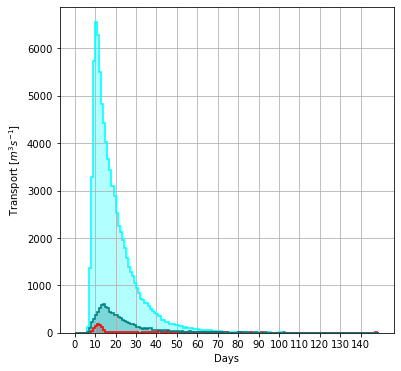

In [ ]:
fig, ax = plt.subplots(1,1, figsize = (6,6))

bins = np.arange(0,150,1)
colours = ['teal', 'red', 'cyan']

n, _, _ = ax.hist([Canyon_age,South_age,eddy_age], bins=bins, weights=[Canyon_tr, South_tr, Eddy_tr], color = colours, label =['Canyon', 'South', 'Eddy'], linewidth = 1.6, histtype='step', stacked=False, zorder=2)
ax.hist([Canyon_age,South_age,eddy_age], bins=bins, weights=[Canyon_tr, South_tr, Eddy_tr], color = colours, histtype='stepfilled', alpha=0.3, stacked=False, zorder=1)
ax.set_xlabel('Days')
ax.set_ylabel('Transport [$m^{3}s^{-1}$]')
ax.set_xticks(np.arange(0,150,10))
ax.grid()
# ax.set_ylim([0,1750])

## winter 2016/17

In [ ]:
dataS = data
data = xr.open_dataset('/ocean/rbeutel/MOAD/analysis-becca/Ariane/CIOPS_BC12/back_eddybdy_31mar17/ariane_positions_quantitative.nc')

In [ ]:
mon16 = ['oct16', 'nov16', 'dec16', 'jan17', 'feb17', 'mar17']
mon_len = [31, 30, 31, 31, 28, 31]
h = 3601
win_start = [h, h+sum(mon_len[:1])*24, h+sum(mon_len[:2])*24, h+sum(mon_len[:3])*24, h+sum(mon_len[:4])*24, h+sum(mon_len[:5])*24]
win_end = [h+sum(mon_len[:1])*24, h+sum(mon_len[:2])*24, h+sum(mon_len[:3])*24, h+sum(mon_len[:4])*24, h+sum(mon_len[:5])*24, h+sum(mon_len)*24-1]

In [ ]:
south_age = np.append([data.final_age[(data.final_section==South) & (data.init_t >= win_start[0]) & (data.init_t <= win_end[-1])]],
                  [dataS.final_age[(dataS.final_section==South) & (dataS.init_t >= sum_start[0]) & (dataS.init_t <= sum_end[1])]]).astype('float')*to_days

eddy_age = np.append([data.final_age[(data.final_section==Eddy) & (data.init_t >= win_start[0]) & (data.init_t <= win_end[-1])]],
                  [dataS.final_age[(dataS.final_section==Eddy) & (dataS.init_t >= sum_start[0]) & (dataS.init_t <= sum_end[1])]]).astype('float')*to_days

Canyon_age = np.append([data.final_age[(data.final_section==Canyon) & (data.init_t >= win_start[0]) & (data.init_t <= win_end[-1])]],
                  [dataS.final_age[(dataS.final_section==Canyon) & (dataS.init_t >= sum_start[0]) & (dataS.init_t <= sum_end[1])]]).astype('float')*to_days

In [ ]:
time = win_end[-1]-win_start[0]+sum_end[1]-sum_start[0]+2

South_tr = np.append([data.final_transp[(data.final_section==South) & (data.init_t >= win_start[0]) & (data.init_t <= win_end[-1])]],
                  [dataS.final_transp[(dataS.final_section==South) & (dataS.init_t >= sum_start[0]) & (dataS.init_t <= sum_end[1])]])/time

eddy_tr = np.append([data.final_transp[(data.final_section==Eddy) & (data.init_t >= win_start[0]) & (data.init_t <= win_end[-1])]],
                  [dataS.final_transp[(dataS.final_section==Eddy) & (dataS.init_t >= sum_start[0]) & (dataS.init_t <= sum_end[1])]])/time

Canyon_tr = np.append([data.final_transp[(data.final_section==Canyon) & (data.init_t >= win_start[0]) & (data.init_t <= win_end[-1])]],
                  [dataS.final_transp[(dataS.final_section==Canyon) & (dataS.init_t >= sum_start[0]) & (dataS.init_t <= sum_end[1])]])/time

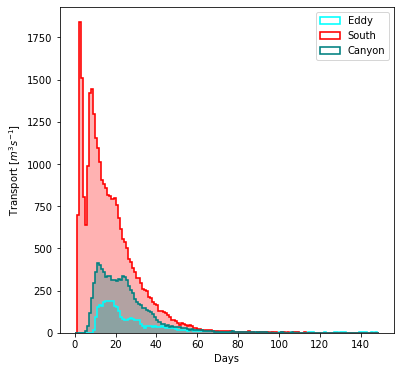

In [ ]:
fig, ax = plt.subplots(1,1, figsize = (6,6))

bins = np.arange(0,150,1)
colours = ['teal', 'red', 'cyan']

n, _, _ = ax.hist([Canyon_age,south_age,eddy_age], bins=bins, weights=[Canyon_tr, South_tr, eddy_tr], color = colours, label =['Canyon', 'South', 'Eddy'], linewidth = 1.6, histtype='step', stacked=False, zorder=2)
ax.hist([Canyon_age,south_age,eddy_age], bins=bins, weights=[Canyon_tr, South_tr, eddy_tr], color = colours, histtype='stepfilled', alpha=0.3, stacked=False, zorder=1)
ax.set_xlabel('Days')
ax.set_ylabel('Transport [$m^{3}s^{-1}$]')
ax.legend()
# ax.set_ylim([0,1750])

## winter 2017/18

In [ ]:
data = xr.open_dataset('/ocean/rbeutel/MOAD/analysis-becca/Ariane/CIOPS_BC12/back_eddybdy_31mar18/ariane_positions_quantitative.nc')

In [ ]:
mon17 = ['oct', 'nov', 'dec', 'jan', 'feb', 'mar']
mon_len = [31, 30, 31, 31, 28, 31]
h = 3601
win_start = [h, h+sum(mon_len[:1])*24, h+sum(mon_len[:2])*24, h+sum(mon_len[:3])*24, h+sum(mon_len[:4])*24, h+sum(mon_len[:5])*24]
win_end = [h+sum(mon_len[:1])*24, h+sum(mon_len[:2])*24, h+sum(mon_len[:3])*24, h+sum(mon_len[:4])*24, h+sum(mon_len[:5])*24, h+sum(mon_len)*24-1]

In [ ]:
eddy_age = data.final_age[(data.final_section==Eddy) & (data.init_t >= win_start[0]) & (data.init_t <= win_end[-1])].astype('float')*to_days
Canyon_age = data.final_age[(data.final_section==Canyon) & (data.init_t >= win_start[0]) & (data.init_t <= win_end[-1])].astype('float')*to_days
South_age = data.final_age[(data.final_section==South) & (data.init_t >= win_start[0]) & (data.init_t <= win_end[-1])].astype('float')*to_days

In [ ]:
time = -(win_start[0]) + (win_end[-1]) + 1
South_tr = data.final_transp[(data.final_section==South) & (data.init_t >= win_start[0]) & (data.init_t <= win_end[-1])]/time
Eddy_tr = data.final_transp[(data.final_section==Eddy) & (data.init_t >= win_start[0]) & (data.init_t <= win_end[-1])]/time
Canyon_tr = data.final_transp[(data.final_section==Canyon) & (data.init_t >= win_start[0]) & (data.init_t <= win_end[-1])]/time

Text(0, 0.5, 'Transport [$m^{3}s^{-1}$]')

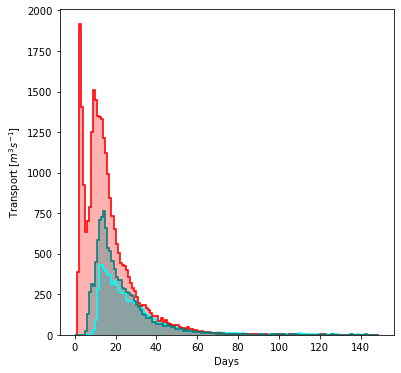

In [ ]:
fig, ax = plt.subplots(1,1, figsize = (6,6))

bins = np.arange(0,150,1)
colours = ['teal', 'red', 'cyan']

n, _, _ = ax.hist([Canyon_age,South_age,eddy_age], bins=bins, weights=[Canyon_tr, South_tr, Eddy_tr], color = colours, label =['Canyon', 'South', 'Eddy'], linewidth = 1.6, histtype='step', stacked=False, zorder=2)
ax.hist([Canyon_age,South_age,eddy_age], bins=bins, weights=[Canyon_tr, South_tr, Eddy_tr], color = colours, histtype='stepfilled', alpha=0.3, stacked=False, zorder=1)
ax.set_xlabel('Days')
ax.set_ylabel('Transport [$m^{3}s^{-1}$]')
# ax.set_ylim([0,1750])